# Task 7 — Time Series Breakdown of Retail Sales

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Walmart train.csv
df = pd.read_csv('/content/train.csv')

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])   # capital D
df = df.set_index('Date')

# Inspect data
print(df.columns)
df.head()



Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday'], dtype='object')


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


/tmp/ipython-input-1167962787.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Weekly_Sales'].resample('M').sum()


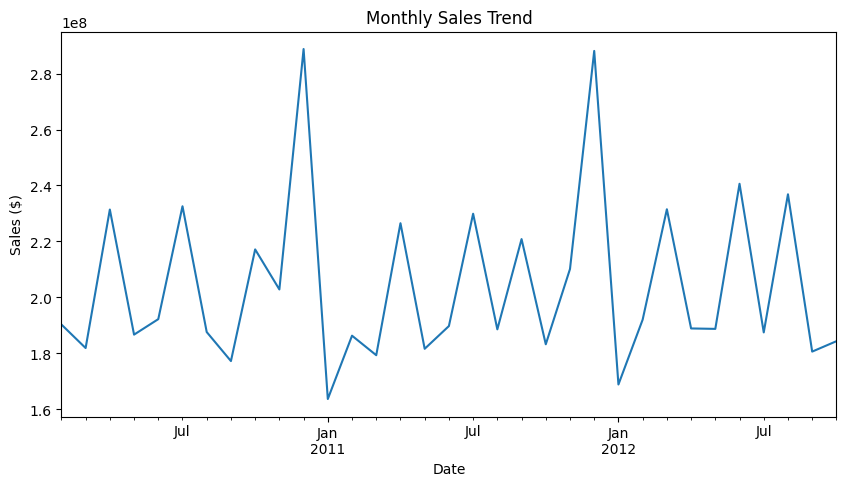

In [5]:
# Resample monthly sales
monthly = df['Weekly_Sales'].resample('M').sum()

monthly.plot(title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel('Sales ($)')
plt.show()


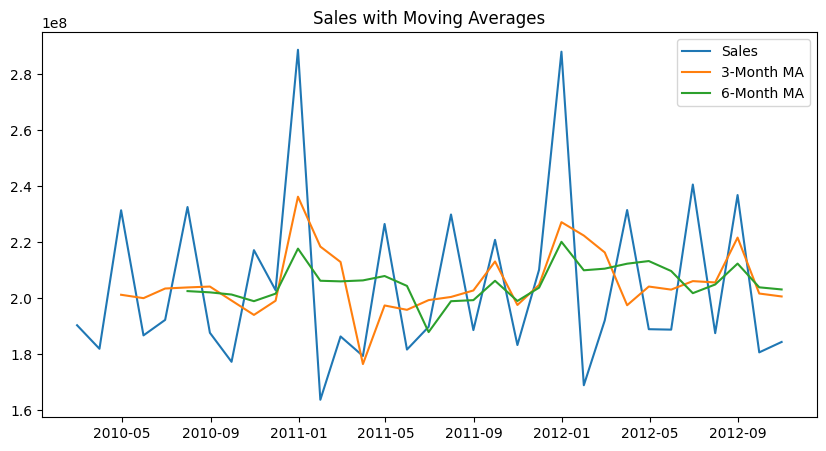

In [6]:

# Moving averages
monthly_ma3 = monthly.rolling(3).mean()
monthly_ma6 = monthly.rolling(6).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly, label='Sales')
plt.plot(monthly_ma3, label='3-Month MA')
plt.plot(monthly_ma6, label='6-Month MA')
plt.legend()
plt.title('Sales with Moving Averages')
plt.show()


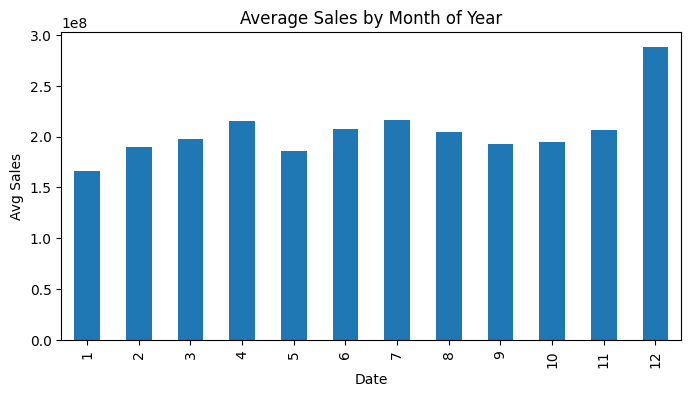

In [7]:

# Seasonality (average sales by month of year)
seasonality = monthly.groupby(monthly.index.month).mean()

seasonality.plot(kind='bar', title='Average Sales by Month of Year', figsize=(8,4))
plt.ylabel('Avg Sales')
plt.show()


In [8]:
# Breakdown by Product
if 'product' in df.columns:
    product_sales = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(5)
    product_sales.plot(kind='bar', title='Top 5 Products by Total Sales', figsize=(8,4))
    plt.ylabel('Sales')
    plt.show()

# Breakdown by Region
if 'region' in df.columns:
    region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
    region_sales.plot(kind='bar', title='Sales by Region', figsize=(8,4))
    plt.ylabel('Sales')
    plt.show()


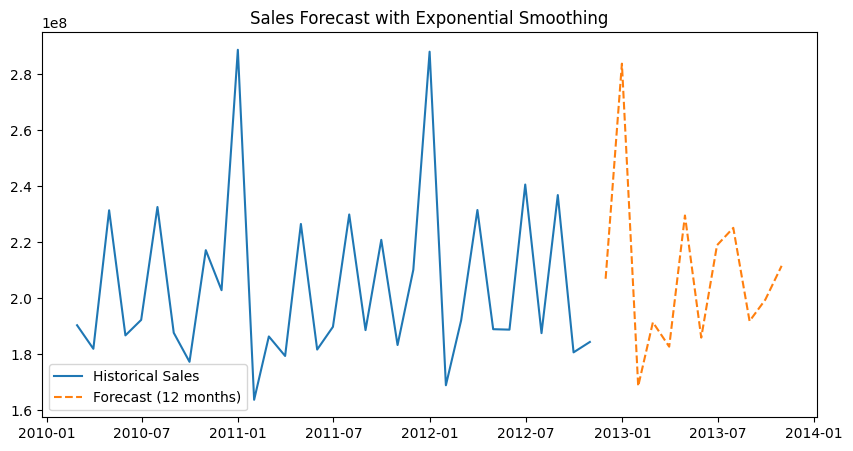

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train on full monthly series
model = ExponentialSmoothing(monthly, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

# Forecast next 12 months
forecast = fit.forecast(12)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(monthly, label='Historical Sales')
plt.plot(forecast, label='Forecast (12 months)', linestyle='--')
plt.title('Sales Forecast with Exponential Smoothing')
plt.legend()
plt.show()


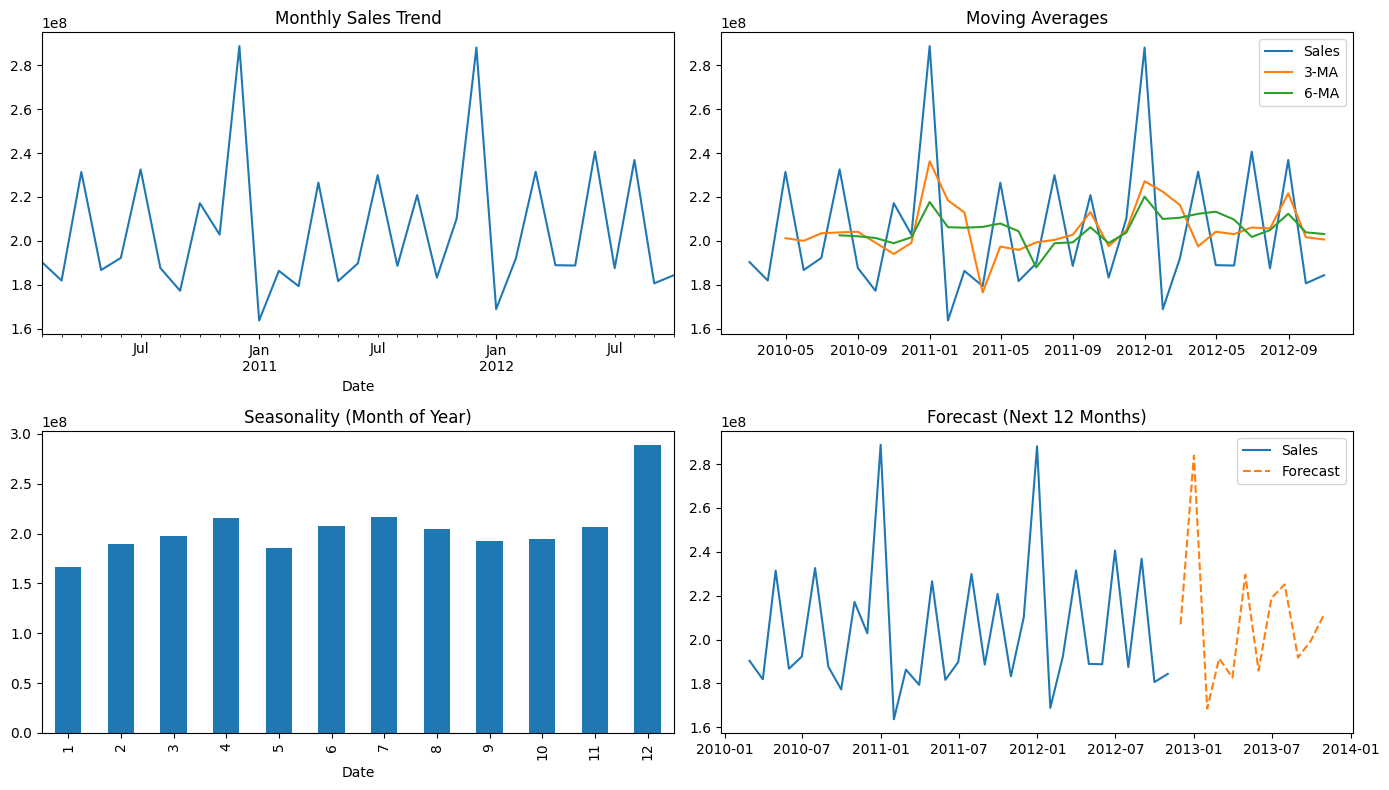

In [10]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

# Trend
monthly.plot(ax=axs[0,0], title='Monthly Sales Trend')

# Moving Averages
axs[0,1].plot(monthly, label='Sales')
axs[0,1].plot(monthly.rolling(3).mean(), label='3-MA')
axs[0,1].plot(monthly.rolling(6).mean(), label='6-MA')
axs[0,1].legend(); axs[0,1].set_title('Moving Averages')

# Seasonality
seasonality.plot(kind='bar', ax=axs[1,0], title='Seasonality (Month of Year)')

# Forecast
axs[1,1].plot(monthly, label='Sales')
axs[1,1].plot(forecast, label='Forecast', linestyle='--')
axs[1,1].legend(); axs[1,1].set_title('Forecast (Next 12 Months)')

plt.tight_layout()
plt.show()
